Task - 2 : City Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset .csv")

In [3]:
data.head(4)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365


In [4]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

1.Identify the city with the highest numberof restaurants in the dataset.

In [15]:
city_count = data['City'].value_counts()
city_count.count()

141

In [7]:
top_city = city_count.idxmax()
top_city

'New Delhi'

In [8]:
print(f"The city with the highest number of restaurants is: {top_city}")

The city with the highest number of restaurants is: New Delhi


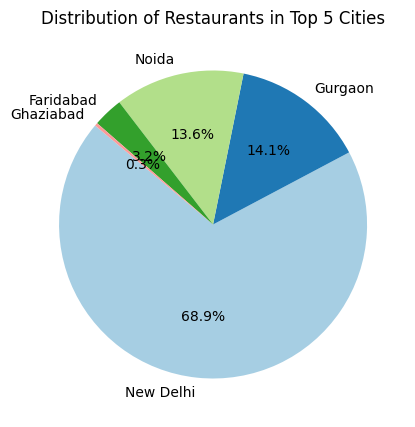

In [9]:
city_counts = data['City'].value_counts()

top_5_cities = city_counts.head(5)

plt.figure(figsize=(5, 5))
plt.pie(top_5_cities, labels=top_5_cities.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Restaurants in Top 5 Cities')  
plt.show()


2.Calculate the average rating for restaurants in each city.

In [10]:
avg_rt_of_res_city = data.groupby('City')['Aggregate rating'].mean()

In [11]:
sorted_cities_by_rating = avg_rt_of_res_city.sort_values(ascending=False)
sorted_cities_by_rating

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64

In [12]:
city_highest_avg_rating = avg_rt_of_res_city.idxmax()
highest_avg_rating = avg_rt_of_res_city.max()

print(f"The city with the highest average rating is \"{city_highest_avg_rating}\" with an average rating of \"{highest_avg_rating:.2f}\"")

The city with the highest average rating is "Inner City" with an average rating of "4.90"


In [13]:
city_highest_avg_rating

'Inner City'

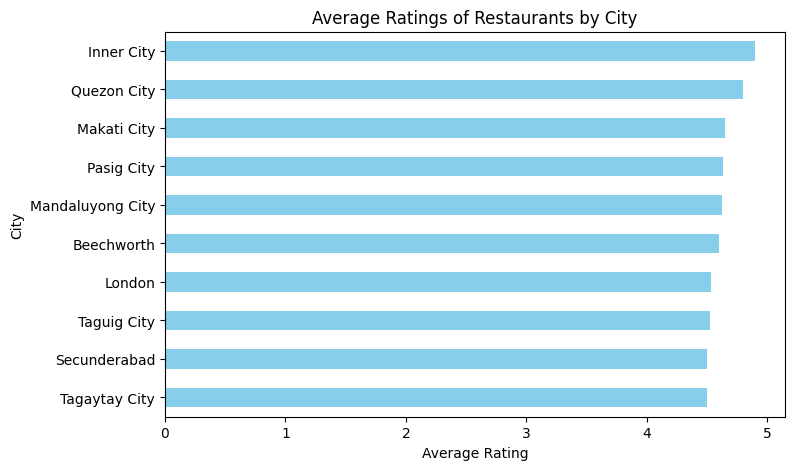

In [14]:
plt.figure(figsize=(8, 5))
sorted_cities_by_rating.head(10).sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Average Ratings of Restaurants by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()